In [1]:
name = "elizabeth"
min(name)

'a'

max(name)

In [2]:
import pandas as pd

df = pd.read_csv('Titanic.csv')
# df = df.drop(columns=['Name','Ticket','Embarked', 'Cabin'])
# df = df.dropna()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# Get the mean fare per class(Pclass)

In [5]:

avg_fare_class = df.groupby('Pclass')['Fare'].mean()
avg_fare_class

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [6]:
avg_fare_class = df.groupby('Pclass').mean('Fare')
avg_fare_class

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


# Get the Gender that survived the most

In [7]:
df.groupby('Sex')['Survived'].sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

# Group by the Pclass and Gender to find the average fare

In [8]:
df.groupby(['Pclass','Sex'])['Fare'].sum()

Pclass  Sex   
1       female    9975.8250
        male      8201.5875
2       female    1669.7292
        male      2132.1125
3       female    2321.1086
        male      4393.5865
Name: Fare, dtype: float64

# Group by Pclass and calculate multiple statistics for Fare (min, max, mean, median, count)

In [9]:
df.groupby('Pclass')['Fare'].agg(['mean','max','median','min','count'])

,mean,max,median,min,count
Pclass,,,,,
1,84.154687,512.3292,60.2875,0.0,216
2,20.662183,73.5000,14.2500,0.0,184
3,13.675550,69.5500,8.0500,0.0,491


In [10]:
df.groupby('Pclass')['Fare'].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [11]:
df.groupby('Pclass')['Fare'].median()

Pclass
1    60.2875
2    14.2500
3     8.0500
Name: Fare, dtype: float64

In [12]:
df.groupby('Pclass')['Fare'].max()

Pclass
1    512.3292
2     73.5000
3     69.5500
Name: Fare, dtype: float64

In [13]:
df.groupby('Pclass')['Fare'].count()

Pclass
1    216
2    184
3    491
Name: Fare, dtype: int64

In [14]:
df.groupby('Pclass')['Fare'].min()

Pclass
1    0.0
2    0.0
3    0.0
Name: Fare, dtype: float64

# Add a new column with the mean fare per class; Transforming 

In [15]:
MeanFarePerClass = df.groupby('Pclass')['Fare'].mean()
df['MeanFarePerClass'] = df.groupby('Pclass')['Fare'].transform('mean')

In [16]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,MeanFarePerClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,13.675550
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,84.154687
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,13.675550
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,84.154687
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,13.675550
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,20.662183
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,84.154687
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,13.675550
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,84.154687


# Find classes with the mean fare above 50; Filtering Groups

In [17]:
# ans = df.groupby('Pclass')['Fare'].mean()
# above = ans[ans > 50]
# above
ans = df.groupby('Pclass')
ans.filter(lambda x: x['Fare'].mean() > 50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,MeanFarePerClass
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,84.154687
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,84.154687
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,84.154687
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,84.154687
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,84.154687
...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,84.154687
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,84.154687
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,84.154687
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,84.154687


# Count the number of passengers in each ticket class

In [18]:
# df.groupby('Pclass')['Ticket']
df.groupby('Pclass')['PassengerId'].count()

Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64

# Calculate the survival rate by class and gender

In [31]:
survival_rate = df.groupby(['Pclass','Sex'])['Survived'].sum()/100
survival_rate

Pclass  Sex   
1       female    0.91
        male      0.45
2       female    0.70
        male      0.17
3       female    0.72
        male      0.47
Name: Survived, dtype: float64

In [32]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'SURVIVAL_RATE')

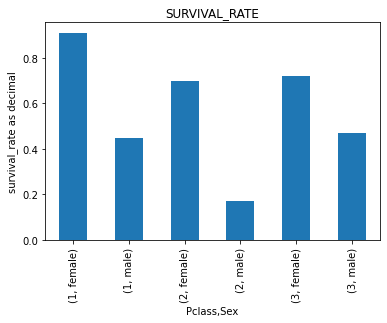

In [35]:
fig,ax = plt.subplots()
survival_rate.plot.bar()
ax.set_ylabel('survival_rate as decimal');
plt.title('SURVIVAL_RATE')

/home/zakidev/anaconda3/envs/learn-env/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/zakidev/anaconda3/envs/learn-env/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


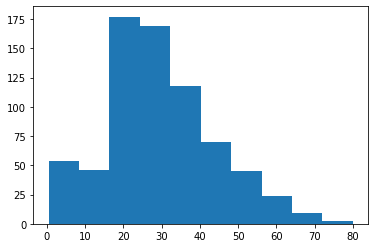

In [36]:
x = df['Age']
plt.hist(x)
plt.show();

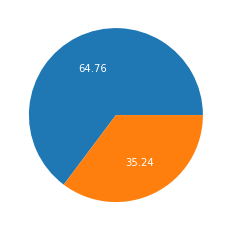

In [21]:
values = df['Sex'].value_counts()
values


plt.pie(values, labels = values.index,  textprops={'color': 'white'}, autopct="%.2f")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

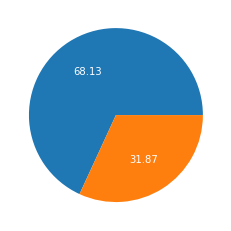

In [22]:
surv = df.groupby('Sex')['Survived'].sum()
plt.pie(surv, labels = surv.index,  textprops={'color': 'white'}, autopct="%.2f")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

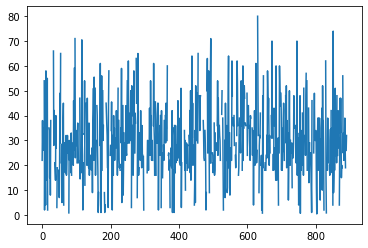

In [23]:
y = df['Age']
plt.plot(y)
plt.show

In [24]:
y = df.groupby(['Pclass','Sex'])['Survived'].sum()